In [4]:
# Unsupervised Learning

In [5]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [6]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [7]:
# K-Means

In [8]:
df = pd.read_csv("OneDrive/Masaüstü/machine learning/machine_learning/datasets/USArrests.csv", index_col=0)

df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [9]:
#amacımız bu eyaletleri segmentlere/gruplara ayırmak

In [10]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [13]:
#değişkenleri standartlaştırmamız gerekiyor

sc = MinMaxScaler((0, 1))

df = sc.fit_transform(df)

In [14]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [15]:
#kmeans modelimizi kuralım

kmeans = KMeans(n_clusters=4, random_state=17).fit(df)

In [16]:
#parametrelere bakalım

kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'warn',
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [17]:
kmeans.n_clusters

#bizim seçmemiz lazım

4

In [18]:
kmeans.cluster_centers_

#çıktı: standartlaştırılmış değerlerdeki birer gözlem birimi

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [19]:
kmeans.labels_

#çıktı: küme etiketleri (0,1,2,3 bunlar kümeler)

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [20]:
kmeans.inertia_

#en yakın cluster'a olan uzaklıklar

3.6834561535859134

In [21]:
# Optimum Küme Sayısının Belirlenmesi

In [22]:
#boş bir kmeans listesi oluşturalım

kmeans = KMeans()

In [23]:
#boş bir liste oluşturalım

ssd = []

In [24]:
K = range(1, 30)

In [25]:
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

In [26]:
ssd

[13.184122550256443,
 6.596893867946196,
 5.021144583531488,
 3.6834561535859134,
 3.1842618139677223,
 2.847308914888751,
 2.5486151838978826,
 2.3682442176146448,
 2.0779187034645408,
 1.9174691706071774,
 1.6484316335951115,
 1.489456524659765,
 1.4114227849797527,
 1.3689928419827921,
 1.221639684362619,
 1.1359857307606078,
 1.0745255642783764,
 1.018226451697899,
 0.9125232074508269,
 0.8387498702163343,
 0.8423220359117348,
 0.7091284629683361,
 0.6528071863342273,
 0.6778492739255009,
 0.5977904592171543,
 0.5670103849653655,
 0.48185145212126956,
 0.4266756232041003,
 0.37347419214347966]

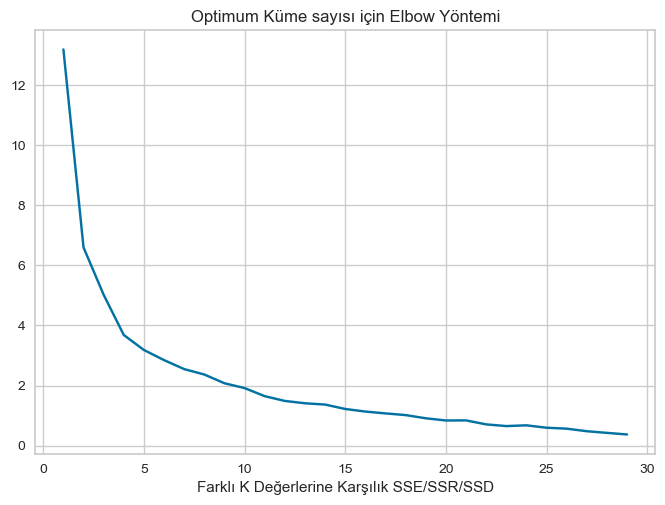

In [27]:
ssd = ssd[:len(K)]

plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show(block=True)

In [28]:
#grafikte küme sayısı arttıkça SSE/SSR/SSD değerleri düşmüş gibi görünüyor

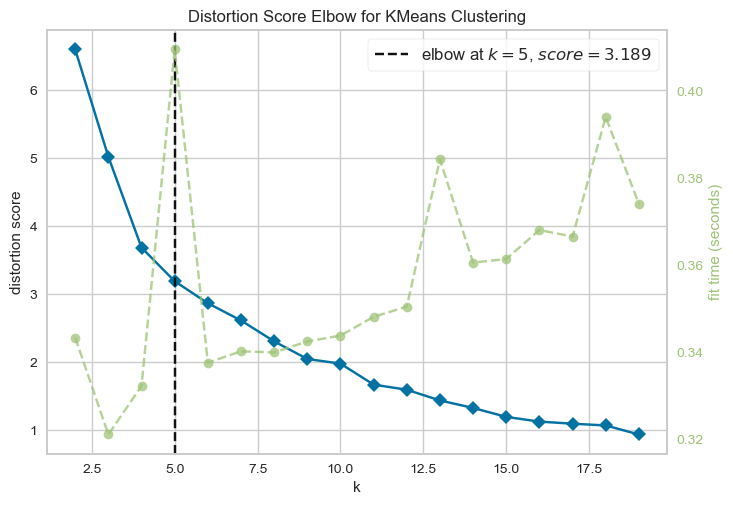

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
kmeans = KMeans()

#elbow yöntemi
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [30]:
#maviler distortion score (distance)
#açık yeşil modeli fit etme süresi
#siyah çizgi optimum nokta (8 önermiş)

#bu şekilde de görebiliriz
elbow.elbow_value_

5

In [31]:
# Final Cluster'ların Oluşturulması

In [32]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

#modeli kurduk/fit ettik

In [33]:
kmeans.n_clusters

5

In [34]:
kmeans.cluster_centers_

array([[0.23674699, 0.25719178, 0.79152542, 0.26356589],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.37198795, 0.35416667, 0.51412429, 0.32235142],
       [0.11311914, 0.08523592, 0.29378531, 0.08182601],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388]])

In [35]:
kmeans.labels_

array([4, 1, 1, 2, 1, 1, 0, 2, 1, 4, 0, 3, 1, 2, 3, 2, 2, 4, 3, 1, 0, 1,
       0, 4, 2, 2, 2, 1, 3, 0, 1, 1, 4, 3, 0, 2, 2, 0, 0, 4, 3, 4, 1, 0,
       3, 2, 0, 3, 3, 2])

In [36]:
#df.head() deresek hata alırız çünkü artık df değil array

df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [37]:
#eyaletlerin yanına hangi clusterlardan olduğunu girelim

clusters_kmeans = kmeans.labels_

df = pd.read_csv("OneDrive/Masaüstü/machine learning/machine_learning/datasets/USArrests.csv", index_col=0)

df["cluster"] = clusters_kmeans

df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [38]:
#0 olmasın istersek

df["cluster"] = df["cluster"] + 1

df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,5
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,2


In [39]:
#mesela 5 numaralı cluster'da hangi eyalet var

df[df["cluster"]==5]

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,5
Georgia,17.4,211,60,25.8,5
Louisiana,15.4,249,66,22.2,5
Mississippi,16.1,259,44,17.1,5
North Carolina,13.0,337,45,16.1,5
South Carolina,14.4,279,48,22.5,5
Tennessee,13.2,188,59,26.9,5


In [40]:
df.groupby("cluster").agg(["count","mean","median"])

#cluster'a göre count mean median bilgisi

Murder                   Assault                    UrbanPop  \
         count       mean median   count        mean median    count   
cluster                                                                
1           10   4.730000    4.2      10  120.100000  120.0       10   
2           12  10.966667   11.2      12  264.000000  259.0       12   
3           12   6.975000    6.7      12  148.416667  153.5       12   
4            9   2.677778    2.2       9   69.888889   57.0        9   
5            7  14.671429   14.4       7  251.285714  249.0        7   

                           Rape                    
              mean median count       mean median  
cluster                                            
1        78.700000   78.5    10  17.500000  17.55  
2        76.500000   80.0    12  33.608333  32.00  
3        62.333333   64.0    12  19.775000  18.75  
4        49.333333   51.0     9  10.466667  10.80  
5        54.285714   58.0     7  21.685714  22.20

In [41]:
df.to_csv("clusters.csv")

#dosyaların arasına clusters.csv dosyası gitti

In [42]:
# Hierarchical Clustering

In [43]:
df = pd.read_csv("OneDrive/Masaüstü/machine learning/machine_learning/datasets/USArrests.csv", index_col=0)

In [44]:
#uzaklık temelli yöntemlere kullandığımız için standartlaştırıyoruz

sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

In [45]:
#linkage : birleştirici bir clustering yöntemi 

hc_average = linkage(df, "average")

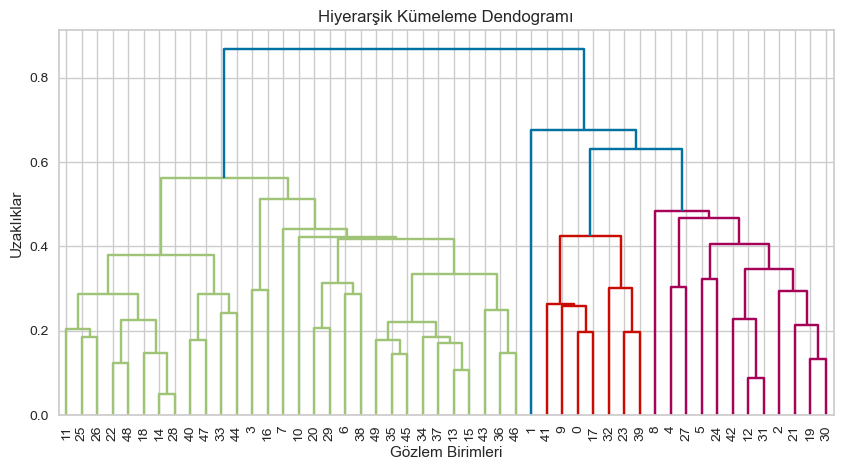

In [46]:
plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           leaf_font_size=10)
plt.show()

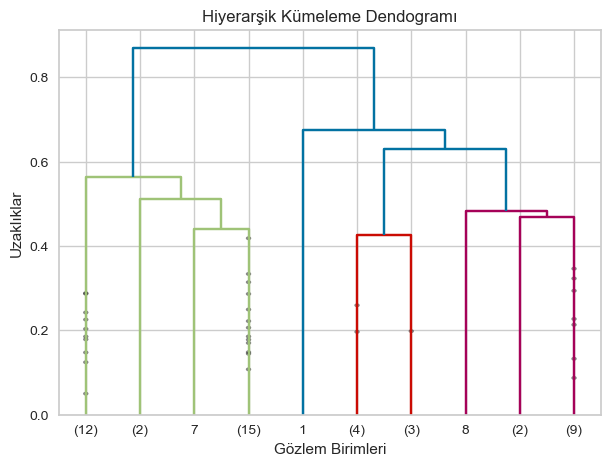

In [47]:
plt.figure(figsize=(7, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

#kümeleri belirledik

In [48]:
# Kume Sayısını Belirlemek

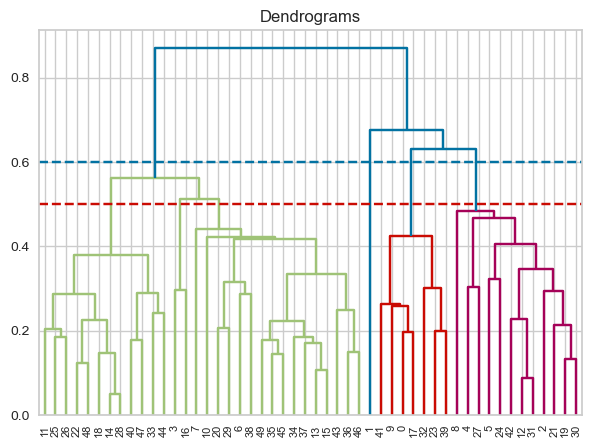

In [49]:
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=0.6, color='b', linestyle='--')
plt.show()

In [50]:
# Final Modeli Oluşturmak

In [51]:
from sklearn.cluster import AgglomerativeClustering

#birleştirici cluster metodu

In [52]:
cluster = AgglomerativeClustering(n_clusters=5, linkage="average")

In [53]:
clusters = cluster.fit_predict(df)
clusters

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 4, 1, 0, 4, 0, 0, 3, 4, 1, 0, 1,
       4, 3, 1, 4, 4, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 0, 0, 4, 4, 0], dtype=int64)

In [54]:
df = pd.read_csv("OneDrive/Masaüstü/machine learning/machine_learning/datasets/USArrests.csv", index_col=0)

In [55]:
df["hi_cluster_no"] = clusters

In [56]:
df["hi_cluster_no"] = df["hi_cluster_no"] 

In [57]:
df["hi_cluster_no"] = df["hi_cluster_no"] + 1

In [58]:
df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2


In [59]:
df["kmeans_cluster_no"] = clusters_kmeans

In [60]:
df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no,kmeans_cluster_no
Alabama,13.2,236,58,21.2,4,4
Alaska,10.0,263,48,44.5,3,1
Arizona,8.1,294,80,31.0,2,1
Arkansas,8.8,190,50,19.5,1,2
California,9.0,276,91,40.6,2,1


In [61]:
df["kmeans_cluster_no"] = df["kmeans_cluster_no"]  + 1

In [62]:
df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no,kmeans_cluster_no
Alabama,13.2,236,58,21.2,4,5
Alaska,10.0,263,48,44.5,3,2
Arizona,8.1,294,80,31.0,2,2
Arkansas,8.8,190,50,19.5,1,3
California,9.0,276,91,40.6,2,2


In [63]:
#hiyerarşik kümeleme ve kmeans sonrası aynı eyalet farklı kümelerde oldu (olabilir)

In [64]:
# Principal Component Analysis (temel bileşen analizi)
# küçük miktarda bilgi kaybını göze alıp değişken boyutunu azaltmaktır

In [65]:
df = pd.read_csv("OneDrive/hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [66]:
#şu an bu df'in bağımlı değişkeni ile ilgilenmiyoruz
#kategorik olanlarla da ilgilenmiyoruz

num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors']

In [67]:
df[num_cols].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


In [68]:
df = df[num_cols]

In [69]:
#df'te eksiklik varsa gönderelim

df.dropna(inplace=True)

In [70]:
df.shape

(322, 16)

In [71]:
#standartlaştırma ihtiyacımız var

df = StandardScaler().fit_transform(df)

In [72]:
#model nesnemiz

pca = PCA()

In [73]:
#nesnemizi oluşturalım

pca_fit = pca.fit_transform(df)

In [74]:
#bileşenlerin açıkladıkları varyans oranları = açıkladıkları bilgi oranları

pca.explained_variance_ratio_

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

In [75]:
#kümulatif varyansları hesaplayalım

np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

In [76]:
# Optimum Bileşen Sayısı

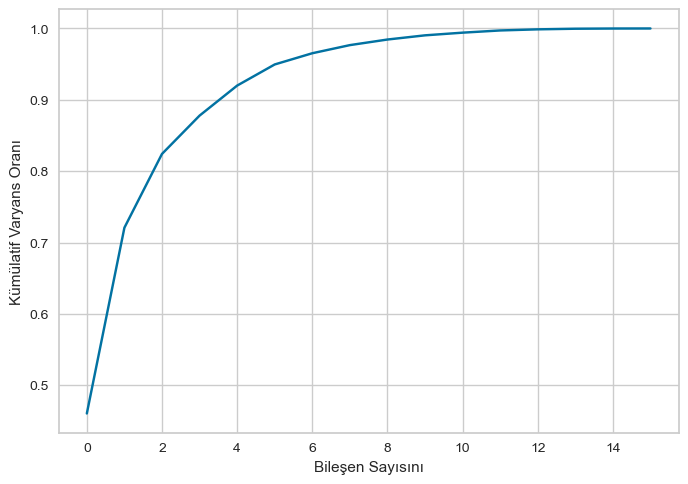

In [77]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

In [78]:
#grafik incelendiğinde 3 gibi bir değer seçilebilir gibi görünüyor
#kendimiz seçiyoruz

In [79]:
pca = PCA(n_components=3) #bileşen sayısı 3 dedik

pca_fit = pca.fit_transform(df)

In [80]:
#açıklanan varyans oranını tekrar getirelim

pca.explained_variance_ratio_

array([0.46037855, 0.26039849, 0.1033886 ])

In [81]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565])

In [82]:
# BONUS: Principal Component Regression (Temel Bileşen Regresyon Modeli)

#diyelim ki Hitters veriseti doğrusal bir model ile modellenmek istiyor ve değişkenler arasında çoklu doğrusal bağlantı
#problemi var. bu doğrusal regresyon modellerinde sağlanması gereken varsayımlardandır. değikenler arasında yüksek
#korelasyon olduğunda bu çeşitli problemlere yol açar. bunu istemiyoruz. diyelim ki böyle bir problemimiz var.
#PCA birçok amaçla kullanılan bir araçtır. şimdi böyle bir amacımız olduğunu düşünelim
#bu amacımızı yerine getireceğiz
#yukarıda çıkarmış olduğumuz bileşenlerin neye karşılık geldiğini anlamaya çalışacağız

In [83]:
df = pd.read_csv("OneDrive/hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [84]:
df.shape

#322 gözlem birimi var

(322, 20)

In [85]:
len(pca_fit)

#aynı gözlem birimi

322

In [86]:
#nümerik sütunları seçelim

num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]
len(num_cols)

#biz bu 16 değişkeni 3 bileşene indirgemiştik

16

In [87]:
#num_cols dışında kalan değişkenleri getirelim 

others = [col for col in df.columns if col not in num_cols]
others

['League', 'Division', 'Salary', 'NewLeague']

In [88]:
#okunabilirlik açısından dataframe'e çevirelim

pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]).head()

#bunun üzerine bir regresyon modeli kuracağız

,PC1,PC2,PC3
0,-3.240106,-0.253173,0.776066
1,0.245488,1.302951,0.118040
2,0.603883,-2.617002,-0.698183
3,3.591276,0.547821,-1.049022
4,-2.264528,-0.698898,-1.290536


In [89]:
df[others].head()

,League,Division,Salary,NewLeague
0,A,E,NaN,A
1,N,W,475.0,N
2,A,W,480.0,A
3,N,E,500.0,N
4,N,E,91.5,N


In [90]:
#axis=1 yani yanyana koy

final_df = pd.concat([pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]),
                      df[others]], axis=1)

final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,A,E,NaN,A
1,0.245488,1.302951,0.118040,N,W,475.0,N
2,0.603883,-2.617002,-0.698183,A,W,480.0,A
3,3.591276,0.547821,-1.049022,N,E,500.0,N
4,-2.264528,-0.698898,-1.290536,N,E,91.5,N


In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [92]:
#model kuracağız ama buradaki kategorik değişkenler sorun
#hepsinin sınıf sayısı 2

In [93]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [94]:
for col in ["NewLeague", "Division", "League"]:
    label_encoder(final_df, col)

In [95]:
final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,0,0,NaN,0
1,0.245488,1.302951,0.118040,1,1,475.0,1
2,0.603883,-2.617002,-0.698183,0,1,480.0,0
3,3.591276,0.547821,-1.049022,1,0,500.0,1
4,-2.264528,-0.698898,-1.290536,1,0,91.5,1


In [96]:
#NaN'lerden kurtulalım

final_df.dropna(inplace=True)

In [97]:
y = final_df["Salary"]
X = final_df.drop(["Salary"], axis=1)

#bağımlı değişken ve bağımsız değişkenler

In [98]:
lm = LinearRegression()

#lineer regresyon modelimizi getirdik
#bunu daha sonra kullanmak gibi bir amacımız olmadığı için fit etmiyoruz direkt hataya bakalım 
#(10 katlı çapraz doğrulama yöntemi ile)

In [99]:
rmse = np.mean(np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

345.60211063519677

In [100]:
#345 iyi bir değer mi diye bakalım

y.mean()

#çıktı: 535 
#çok kötü ya da iyi değil ama doğru yoldayız diyebiliriz

535.9258821292775

In [101]:
cart = DecisionTreeRegressor()
rmse = np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

386.71150703402964

In [102]:
#cart için hiperparametre optimizasyonu yapalım

cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

# GridSearchCV
cart_best_grid = GridSearchCV(cart,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [103]:
cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X, y)

In [104]:
rmse = np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

#daha iyi bir sonuç

330.1964109339104

In [105]:
# BONUS: PCA ile Çok Boyutlu Veriyi 2 Boyutta Görselleştirme

In [106]:
# Breast Cancer

In [107]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [125]:
df = pd.read_csv("OneDrive/breast_cancer.csv")

df.head()

#bağımlı değişken : diagnosis , iyi huylu kötü huylu olarak iki sınıfı var

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [126]:
# "Unnamed: 32" sütununu veri setinden çıkarın
df.drop("Unnamed: 32", axis=1, inplace=True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [127]:
#bu çok değişkenli veriyi 2 boyutta görselleştirmek istiyoruz

In [128]:
#bağımlı ve bağımsız değişkenleri seçelim

y = df["diagnosis"]
X = df.drop(["diagnosis", "id"], axis=1)

In [129]:
#öncelikle verisetini 2 boyuta indirgememiz lazım
#daha sonra 2 boyuta indirgediğimiz veriyi görselleştirmemiz lazım

In [130]:
#2 boyuta indirgeme için :

def create_pca_df(X, y):
    
    #bağımsız değişkenleri standartlaştıracak
    X = StandardScaler().fit_transform(X)
    
    #pca hesabı yapacak
    pca = PCA(n_components=2)
    
    #değişken değerlerini dönüştürmüş olacak, yani bileşenleri çıkarmış olacak
    pca_fit = pca.fit_transform(X)
    
    #bu bileşenleri bir dataframe çevirdikten sonra
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    
    #bağımlı değişken ile yanyana concat ederek
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    
    #dışarıya return edecek
    return final_df

In [132]:
pca_df = create_pca_df(X, y)
pca_df

#veriseti iki bileşene indirgendi, daha önce onlarca veri vs vardı şimdi sadece iki değişken var: PC1 ve PC2

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


In [133]:
df.shape

#32 değişken arasından 1i bağımlı değişken diğeri id değişkeni o zaman bizim 30 değişkenimiz vardı
#bunu 2ye indirgedik

(569, 32)

In [134]:
#şimdi bu 2 bileşeni görselleştirelim

#bu genel bir pca görselleştirme fonksiyonudur

def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    
    #target'ın ismini büyüterek görsele koy:
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    #target'ın eşsiz sınıflarını bulacak, bunları liste halinde tutacak
    targets = list(dataframe[target].unique())
    colors = random.sample(['r', 'b', "g", "y"], len(targets))

    for t, color in zip(targets, colors):
        
        #daha sonra her bir target'a göre seçim işlemini yapıp
        indices = dataframe[target] == t
        
        #iki boyuta göre scatter plot oluşturacak ve bağımlı değişkenleri grafiğin üzerine işaretleyecek
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

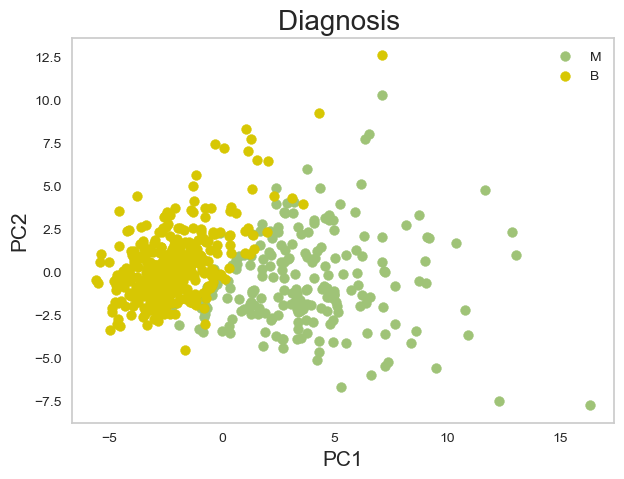

In [135]:
plot_pca(pca_df, "diagnosis")

In [138]:
#başka bir veri setine daha uyarlayalım
#bu da yine bir sınıflandırma problemi
# Iris

import seaborn as sns
df = sns.load_dataset("iris")
df

#bu verisetinde 4 tane bağımsız değişken var
#ama 3 tane sınıfı olan bir bağımlı değişken var
#yani binary bir classification problemi değil de multiclass bir classification problemi

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [140]:
y = df["species"]
X = df.drop(["species"], axis=1)

#yukarıdaki fonksiyonları kullanabiliriz ama X'in nümerik olması gerekiyor, kategorik değişken olmamalı

X

#gördüğümüz gibi X zaten nümerik

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [141]:
pca_df = create_pca_df(X, y)

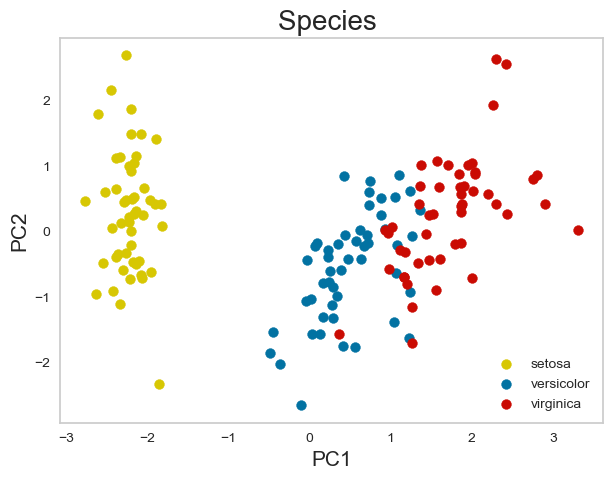

In [142]:
plot_pca(pca_df, "species")

In [143]:
# Diabetes

In [145]:
df = pd.read_csv("OneDrive/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [146]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [147]:
pca_df = create_pca_df(X, y)

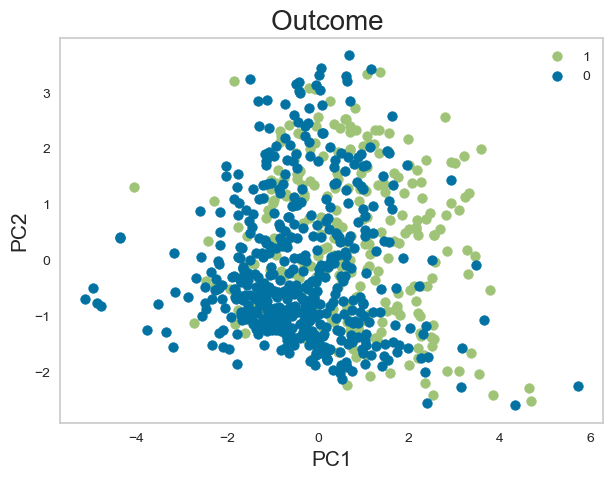

In [148]:
plot_pca(pca_df, "Outcome")